In [1]:
import openbabel
from openbabel import pybel
import csv,sys
import pandas as pd
import numpy as np

In [2]:
#get SMARTS and Dataset
#file with column called “FG” with list of FGs to analyse, and column called “SMARTS” of SMARTS codes
SMARTS1=pd.read_csv('/Users/jiayun/Documents/work/outliers/SMARTS.csv') 

In [3]:
SMARTS1['SMARTS']

0                                           [F,Cl,Br,I]
1                                                   [F]
2                                                  [Cl]
3                                                  [Br]
4                                                   [I]
5                                           [CX3]=[OX1]
6                                     [#6][CX3](=O)[#6]
7                                       [CX3H1](=O)[#6]
8                                [NX3][CX3](=[OX1])[#6]
9                              [#6][CX3](=O)[OX2H0][#6]
10                                     [CX3](=O)[OX2H1]
11    [$([cX3](:*):*),$([cX2+](:*):*),$([CX3]=*),$([...
12                                         [$([CX2]#C)]
13                     [$([cX3](:*):*),$([cX2+](:*):*)]
14                                          [NX1]#[CX2]
15                                 [NX3;H2,H1;!$(NC=O)]
16              [$([NX3](=O)=O),$([NX3+](=O)[O-])][!#8]
17                                          [NX2

In [4]:
#load dataset 
fps_d2 = pd.read_csv('/Users/jiayun/Documents/work/outliers/fps_ngboost_h_outliers2.csv')
m2v_ngb_d2 = pd.read_csv('/Users/jiayun/Documents/work/outliers/m2v_ngboost_h_outliers2.csv')
bert_d2 = pd.read_csv('/Users/jiayun/Documents/work/outliers/bert_h_outliers2.csv')
bert2_d2 = pd.read_csv('/Users/jiayun/Documents/work/outliers/bert2_h_outliers2.csv')

In [5]:
fps_d2

,Unnamed: 0,Unnamed: 0.1,0,1,2,SMILES,Mol_No,actual,predict,residual,std_residual
0,63,63,376,376,376,CCN=[N+]=[N-],376,12.9,5.454428,-7.445572,-2.011840
1,122,122,723,724,723,C=O,723,15.4,6.512453,-8.887547,-2.401471
2,144,144,845,847,845,COO,845,30.0,8.135009,-21.864991,-5.908057
3,158,158,937,939,937,CN[C@@H](C)[C@H](O)c1ccccc1,937,24.1,10.573800,-13.526200,-3.654864
4,171,171,1010,1012,1010,Oc1c(cc(cc1[N+]([O-])=O)[N+]([O-])=O)[N+]([O-])=O,1010,6.0,14.407329,8.407329,2.271713
5,14,14,67,67,67,OCCCO,67,23.2,14.799050,-8.400950,-2.269989
6,15,15,72,72,72,Oc1ccc(O)cc1,72,27.2,13.896777,-13.303223,-3.594614
7,53,53,319,319,319,CC=NO,319,20.2,8.790027,-11.409973,-3.083046
8,64,64,367,367,367,N,367,18.8,6.309685,-12.490315,-3.374961
9,127,127,724,725,724,NC=O,724,19.0,10.647782,-8.352218,-2.256822


In [6]:
m2v_ngb_d2

,Unnamed: 0,Unnamed: 0.1,0,1,2,SMILES,Mol_No,actual,predict,residual,std_residual
0,54,54,321,321,321,CC(=O)Nc1ccccc1,321,13.5,6.697455,-6.802545,-2.014606
1,122,122,723,724,723,C=O,723,15.4,7.802447,-7.597553,-2.250052
2,123,123,732,733,732,OCC(O)CO.OC(O)=O,732,17.4,24.154690,6.754690,2.000434
3,124,124,733,734,733,CC(O)=O.OCC(O)CO.OC(O)=O,733,9.2,20.874168,11.674168,3.457361
4,144,144,845,847,845,COO,845,30.0,7.514943,-22.485057,-6.659058
5,158,158,937,939,937,CN[C@@H](C)[C@H](O)c1ccccc1,937,24.1,7.737879,-16.362121,-4.845721
6,15,15,72,72,72,Oc1ccc(O)cc1,72,27.2,17.675422,-9.524578,-2.820750
7,24,24,129,129,129,OCC(F)(F)F,129,16.4,9.293882,-7.106118,-2.104511
8,38,38,237,237,237,OCC#C,237,18.8,11.789109,-7.010891,-2.076309
9,53,53,319,319,319,CC=NO,319,20.2,10.396875,-9.803125,-2.903242


In [7]:
bert_d2

,Unnamed: 0,Unnamed: 0.1,smiles,actual,predict,residual,std_residual
0,6,6,OCCC#N,17.6,6.049999,-11.550001,-3.607388
1,24,24,NCCO,21.0,6.498917,-14.501083,-4.529093
2,70,70,CC=NO,20.2,8.302810,-11.897190,-3.715824
3,134,134,S=C=S,0.6,9.518504,8.918504,2.785498
4,173,173,CCCCO,15.8,7.040967,-8.759033,-2.735690
...,...,...,...,...,...,...,...
68,75,75,OCCN1CCCC1=O,15.7,8.913386,-6.786614,-2.119649
69,79,79,BrC#N,0.0,6.453456,6.453456,2.015594
70,107,107,C1CCCCCCCCCCC1,0.0,7.269525,7.269525,2.270475
71,172,172,CCN=C=S,9.0,1.482540,-7.517460,-2.347912


In [8]:
bert2_d2

,Unnamed: 0,Unnamed: 0.1,smiles,exp,predict,residual,std_residual
0,0,0,SC#N,10.9,5.029569,-5.870431,-2.146044
1,19,19,C[P](F)(F)=O,8.4,-0.878434,-9.278434,-3.391901
2,70,70,CC=NO,20.2,13.505288,-6.694712,-2.447375
3,78,78,OC=O,14.0,22.777193,8.777193,3.208664
4,121,121,N,18.8,12.654545,-6.145455,-2.246584
...,...,...,...,...,...,...,...
60,61,61,CC(=O)Nc1ccc(O)cc1,13.9,20.411549,6.511549,2.380416
61,65,65,OC(=O)CS,20.0,13.867423,-6.132577,-2.241876
62,119,119,C1C=Cc2ccccc12,9.0,3.121525,-5.878475,-2.148984
63,175,175,OCCOCCOCCOC=C,6.6,13.030194,6.430194,2.350675


In [9]:
#outputfile
Output="FG_hansen_h_fps_d2_v2.csv"

#Functional Group names 
FG_names=SMARTS1['FG']

#Get SMART CODES 
SMARTS_codes=SMARTS1['SMARTS']

#Get SMILES
smiles=fps_d2['SMILES']
fps_d2=np.array(fps_d2)
FG_list=[]

for f in range(len(fps_d2)):
    FG=[]
    #Get StdInChIKey identifier
    FG.append(fps_d2[f][5])
    #Create mol object from smiles
    mol=pybel.readstring("smi",smiles[f])
    #match all SMARTS to SMILES
    
#for each molecule
for f in range(len(fps_d2)):
    FG=[]
    #Get StdInChIKey identifier
    FG.append(fps_d2[f][5])
    #Create mol object from smiles
    mol=pybel.readstring("smi",smiles[f])
    #match all SMARTS to SMILES
    for g in SMARTS_codes:
        smarts = pybel.Smarts(g)
        if smarts.findall(mol) == []:
            FG.append("0")
        else:
            FG.append("1")
    FG_list.append(FG)

FG_names2=list(FG_names) 
FG_names2.insert(0,"StdInChIKey") 
FG_list=pd.DataFrame(data=FG_list,columns=FG_names2) 

#this can then be outputted/merged or graphed 
FG_list.to_csv(Output,index=False)    

In [10]:
FG_list

,StdInChIKey,Halides,F,Cl,Br,I,Carbonyl,Ketone,Aldehyde,Amide,...,Alcohol,Ether inc. ester,P,S,Thiol,Thioamide,Sulfonamide,H-bond donor,Acidic hydroxyl,H-bond acceptor
0,CCN=[N+]=[N-],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,C=O,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,COO,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
3,CN[C@@H](C)[C@H](O)c1ccccc1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
4,Oc1c(cc(cc1[N+]([O-])=O)[N+]([O-])=O)[N+]([O-])=O,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
5,OCCCO,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
6,Oc1ccc(O)cc1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
7,CC=NO,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
8,N,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
9,NC=O,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [11]:
FG_sum_fps_d2 = FG_list.iloc[:,1:30].astype(int).sum()
FG_sum_fps_d2_merge = (FG_sum_fps_d2.to_frame('fps_d2'))/len(fps_d2)

In [12]:
#outputfile
Output="FG_hansen_h_m2v_ngb_d2_v2.csv"

#Functional Group names 
FG_names=SMARTS1['FG']

#Get SMART CODES 
SMARTS_codes=SMARTS1['SMARTS']

#Get SMILES
smiles=m2v_ngb_d2['SMILES']
m2v_ngb_d2=np.array(m2v_ngb_d2)
FG_list=[]

for f in range(len(m2v_ngb_d2)):
    FG=[]
    #Get StdInChIKey identifier
    FG.append(m2v_ngb_d2[f][5])
    #Create mol object from smiles
    mol=pybel.readstring("smi",smiles[f])
    #match all SMARTS to SMILES

#for each molecule
for f in range(len(m2v_ngb_d2)):
    FG=[]
    #Get StdInChIKey identifier
    FG.append(m2v_ngb_d2[f][5])
    #Create mol object from smiles
    mol=pybel.readstring("smi",smiles[f])
    #match all SMARTS to SMILES
    for g in SMARTS_codes:
        smarts = pybel.Smarts(g)
        if smarts.findall(mol) == []:
            FG.append("0")
        else:
            FG.append("1")
    FG_list.append(FG)

FG_names2=list(FG_names) 
FG_names2.insert(0,"StdInChIKey") 
FG_list=pd.DataFrame(data=FG_list,columns=FG_names2) 

#this can then be outputted/merged or graphed 
FG_list.to_csv(Output,index=False)

In [13]:
FG_list

,StdInChIKey,Halides,F,Cl,Br,I,Carbonyl,Ketone,Aldehyde,Amide,...,Alcohol,Ether inc. ester,P,S,Thiol,Thioamide,Sulfonamide,H-bond donor,Acidic hydroxyl,H-bond acceptor
0,CC(=O)Nc1ccccc1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,C=O,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,OCC(O)CO.OC(O)=O,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,1
3,CC(O)=O.OCC(O)CO.OC(O)=O,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,1
4,COO,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
5,CN[C@@H](C)[C@H](O)c1ccccc1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
6,Oc1ccc(O)cc1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
7,OCC(F)(F)F,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
8,OCC#C,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
9,CC=NO,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [14]:
FG_sum_m2v_ngb_d2 = FG_list.iloc[:,1:30].astype(int).sum()
FG_sum_m2v_ngb_d2_merge = (FG_sum_m2v_ngb_d2.to_frame('m2v_ngb_d2'))/len(m2v_ngb_d2)

In [15]:
#outputfile
Output="FG_hansen_h_bert_d2_v2.csv"

#Functional Group names 
FG_names=SMARTS1['FG']

#Get SMART CODES 
SMARTS_codes=SMARTS1['SMARTS']

#Get SMILES
smiles=bert_d2['smiles']
bert_d2=np.array(bert_d2)
FG_list=[]

for f in range(len(bert_d2)):
    FG=[]
    #Get StdInChIKey identifier
    FG.append(bert_d2[f][2])
    #Create mol object from smiles
    mol=pybel.readstring("smi",smiles[f])
    #match all SMARTS to SMILES

#for each molecule
for f in range(len(bert_d2)):
    FG=[]
    #Get StdInChIKey identifier
    FG.append(bert_d2[f][2])
    #Create mol object from smiles
    mol=pybel.readstring("smi",smiles[f])
    #match all SMARTS to SMILES
    for g in SMARTS_codes:
        smarts = pybel.Smarts(g)
        if smarts.findall(mol) == []:
            FG.append("0")
        else:
            FG.append("1")
    FG_list.append(FG)

FG_names2=list(FG_names) 
FG_names2.insert(0,"StdInChIKey") 
FG_list=pd.DataFrame(data=FG_list,columns=FG_names2) 

#this can then be outputted/merged or graphed 
FG_list.to_csv(Output,index=False)

In [16]:
FG_list

,StdInChIKey,Halides,F,Cl,Br,I,Carbonyl,Ketone,Aldehyde,Amide,...,Alcohol,Ether inc. ester,P,S,Thiol,Thioamide,Sulfonamide,H-bond donor,Acidic hydroxyl,H-bond acceptor
0,OCCC#N,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
1,NCCO,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
2,CC=NO,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
3,S=C=S,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,CCCCO,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,OCCN1CCCC1=O,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,1
69,BrC#N,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
70,C1CCCCCCCCCCC1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,CCN=C=S,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [17]:
FG_sum_bert_d2 = FG_list.iloc[:,1:30].astype(int).sum()
FG_sum_bert_d2_merge = (FG_sum_bert_d2.to_frame('bert_d2'))/len(bert_d2)

In [18]:
#outputfile
Output="FG_hansen_h_bert2_d2_v2.csv"

#Functional Group names 
FG_names=SMARTS1['FG']

#Get SMART CODES 
SMARTS_codes=SMARTS1['SMARTS']

#Get SMILES
smiles=bert2_d2['smiles']
bert2_d2=np.array(bert2_d2)
FG_list=[]

for f in range(len(bert2_d2)):
    FG=[]
    #Get StdInChIKey identifier
    FG.append(bert2_d2[f][2])
    #Create mol object from smiles
    mol=pybel.readstring("smi",smiles[f])
    #match all SMARTS to SMILES

#for each molecule
for f in range(len(bert2_d2)):
    FG=[]
    #Get StdInChIKey identifier
    FG.append(bert2_d2[f][2])
    #Create mol object from smiles
    mol=pybel.readstring("smi",smiles[f])
    #match all SMARTS to SMILES
    for g in SMARTS_codes:
        smarts = pybel.Smarts(g)
        if smarts.findall(mol) == []:
            FG.append("0")
        else:
            FG.append("1")
    FG_list.append(FG)

FG_names2=list(FG_names) 
FG_names2.insert(0,"StdInChIKey") 
FG_list=pd.DataFrame(data=FG_list,columns=FG_names2) 

#this can then be outputted/merged or graphed 
FG_list.to_csv(Output,index=False)

In [19]:
FG_list

,StdInChIKey,Halides,F,Cl,Br,I,Carbonyl,Ketone,Aldehyde,Amide,...,Alcohol,Ether inc. ester,P,S,Thiol,Thioamide,Sulfonamide,H-bond donor,Acidic hydroxyl,H-bond acceptor
0,SC#N,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,1
1,C[P](F)(F)=O,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,CC=NO,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
3,OC=O,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,1
4,N,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,CC(=O)Nc1ccc(O)cc1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,1
61,OC(=O)CS,0,0,0,0,0,1,0,0,0,...,1,0,0,1,1,0,0,1,1,1
62,C1C=Cc2ccccc12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63,OCCOCCOCCOC=C,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,1


In [20]:
FG_sum_bert2_d2 = FG_list.iloc[:,1:30].astype(int).sum()
FG_sum_bert2_d2_merge = (FG_sum_bert2_d2.to_frame('bert2_d2'))/len(bert2_d2)

In [21]:
FG_sum_bert2_d2_merge

,bert2_d2
Halides,0.138462
F,0.061538
Cl,0.076923
Br,0.000000
I,0.000000
Carbonyl,0.215385
Ketone,0.030769
Aldehyde,0.000000
Amide,0.046154
Ester,0.030769


In [22]:
FG_sum_hansen = pd.read_parquet('FG_sum_hansen.parquet')

In [23]:
FG_sum_fps_d2_merge ['m2v_ngb_d2'] =  FG_sum_m2v_ngb_d2_merge
FG_sum_fps_d2_merge ['bert_d2'] =  FG_sum_bert_d2_merge
FG_sum_fps_d2_merge ['bert2_d2'] =  FG_sum_bert2_d2_merge
FG_sum_fps_d2_merge ['hansen'] =  FG_sum_hansen/1183

In [24]:
FG_sum_fps_d2_merge

,fps_d2,m2v_ngb_d2,bert_d2,bert2_d2,hansen
Halides,0.121951,0.152174,0.136986,0.138462,0.252747
F,0.048780,0.065217,0.054795,0.061538,0.047337
Cl,0.048780,0.086957,0.041096,0.076923,0.174979
Br,0.024390,0.000000,0.027397,0.000000,0.040575
I,0.000000,0.000000,0.013699,0.000000,0.007608
Carbonyl,0.268293,0.260870,0.136986,0.215385,0.294167
Ketone,0.024390,0.000000,0.000000,0.030769,0.054100
Aldehyde,0.000000,0.000000,0.000000,0.000000,0.027050
Amide,0.024390,0.043478,0.027397,0.046154,0.024514
Ester,0.024390,0.000000,0.041096,0.030769,0.120034


Text(0, 0.5, 'Average occurance/molecule')

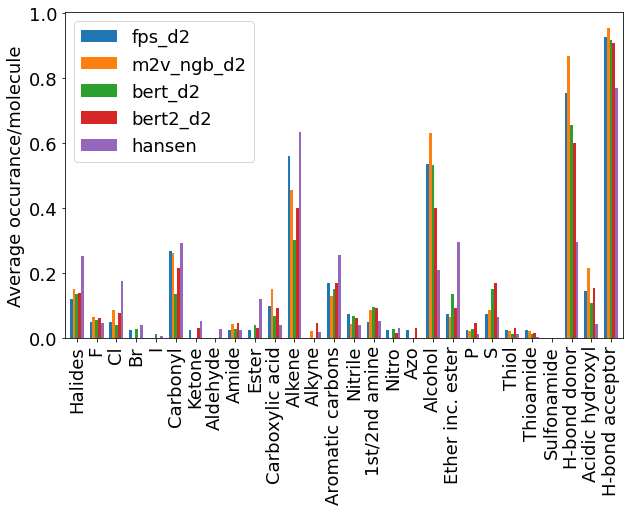

In [25]:
import matplotlib.pyplot as plt
# Set the default text font size
plt.rc('font', size=18)
ax=FG_sum_fps_d2_merge.plot.bar(figsize=(10,6), width=0.7)
ax.set_ylabel("Average occurance/molecule", size=18)

In [26]:
FG_sum_fps_d2_merge['fps'] = FG_sum_fps_d2_merge['fps_d2']-FG_sum_fps_d2_merge['hansen']
FG_sum_fps_d2_merge['m2v_ngb'] = FG_sum_fps_d2_merge['m2v_ngb_d2']-FG_sum_fps_d2_merge['hansen']
FG_sum_fps_d2_merge['bert'] = FG_sum_fps_d2_merge['bert_d2']-FG_sum_fps_d2_merge['hansen']
FG_sum_fps_d2_merge['bert2'] = FG_sum_fps_d2_merge['bert2_d2']-FG_sum_fps_d2_merge['hansen']

In [27]:
FG_sum_fps_d2_merge

,fps_d2,m2v_ngb_d2,bert_d2,bert2_d2,hansen,fps,m2v_ngb,bert,bert2
Halides,0.121951,0.152174,0.136986,0.138462,0.252747,-0.130796,-0.100573,-0.115761,-0.114286
F,0.048780,0.065217,0.054795,0.061538,0.047337,0.001443,0.017880,0.007457,0.014201
Cl,0.048780,0.086957,0.041096,0.076923,0.174979,-0.126198,-0.088022,-0.133883,-0.098056
Br,0.024390,0.000000,0.027397,0.000000,0.040575,-0.016185,-0.040575,-0.013178,-0.040575
I,0.000000,0.000000,0.013699,0.000000,0.007608,-0.007608,-0.007608,0.006091,-0.007608
Carbonyl,0.268293,0.260870,0.136986,0.215385,0.294167,-0.025875,-0.033298,-0.157181,-0.078783
Ketone,0.024390,0.000000,0.000000,0.030769,0.054100,-0.029710,-0.054100,-0.054100,-0.023331
Aldehyde,0.000000,0.000000,0.000000,0.000000,0.027050,-0.027050,-0.027050,-0.027050,-0.027050
Amide,0.024390,0.043478,0.027397,0.046154,0.024514,-0.000124,0.018964,0.002883,0.021640
Ester,0.024390,0.000000,0.041096,0.030769,0.120034,-0.095644,-0.120034,-0.078938,-0.089265


In [28]:
FG_sum_fps_d2_merge_change = FG_sum_fps_d2_merge[['fps', 'm2v_ngb', 'bert', 'bert2']]

Text(0, 0.5, 'Change of average occurance/molecule')

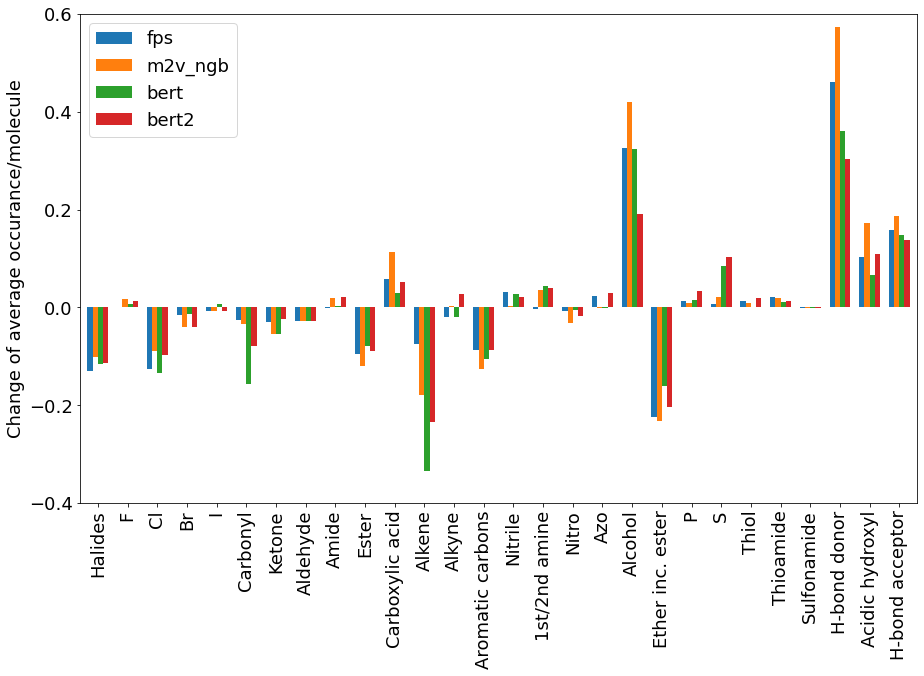

In [31]:
# Set the default text font size
plt.rc('font', size=18)
ax=FG_sum_fps_d2_merge_change.plot.bar(figsize=(15,9), ylim = (-0.4, 0.6), width=0.7)
ax.set_ylabel("Change of average occurance/molecule", size=18)